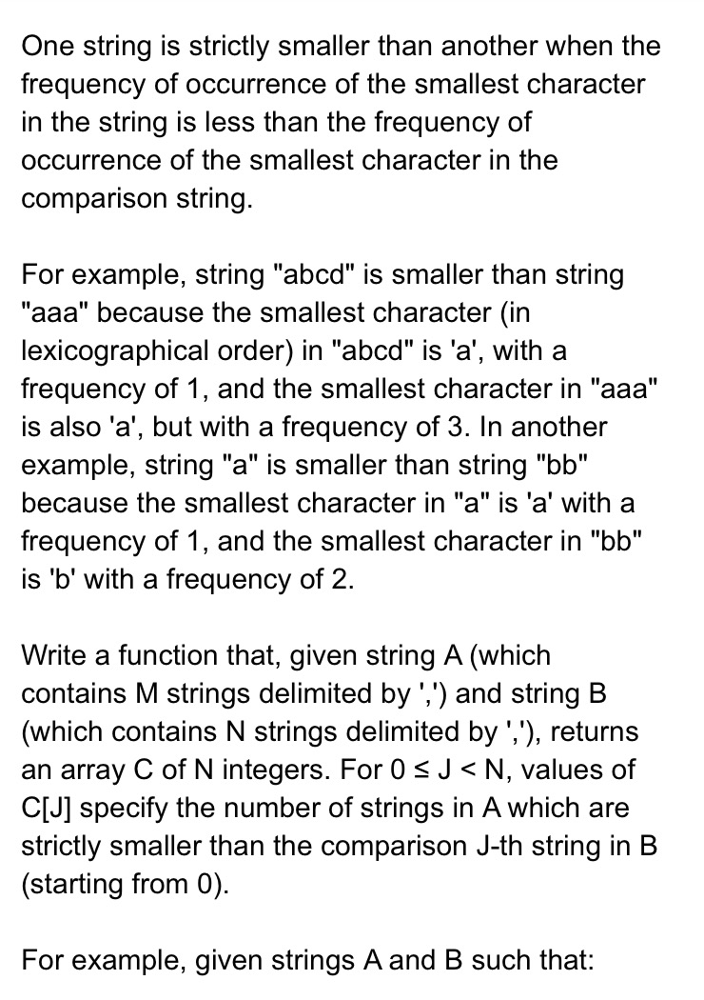

In [1]:
from IPython.display import Image
Image("image_1563485161.png")

In [3]:
#Here is a O(M+N) Runtime and O(1) Python solution.
def solve(A, B):
    wordsA = A.split(",")
    wordsB = B.split(",")
    freqCounter = [0] * 11
    
    for w in wordsA:
        minFreq = w.count(min(w))
        freqCounter[minFreq] += 1
    
    toReturn = []
    for w in wordsB:
        minFreq = w.count(min(w))
        toReturn.append(sum(freqCounter[:minFreq]))
        
    return toReturn

In [5]:
from collections import Counter

def numOfSplit(s):
    res = 1
    for count in Counter(s).values():
        res *= count - 1
    return res

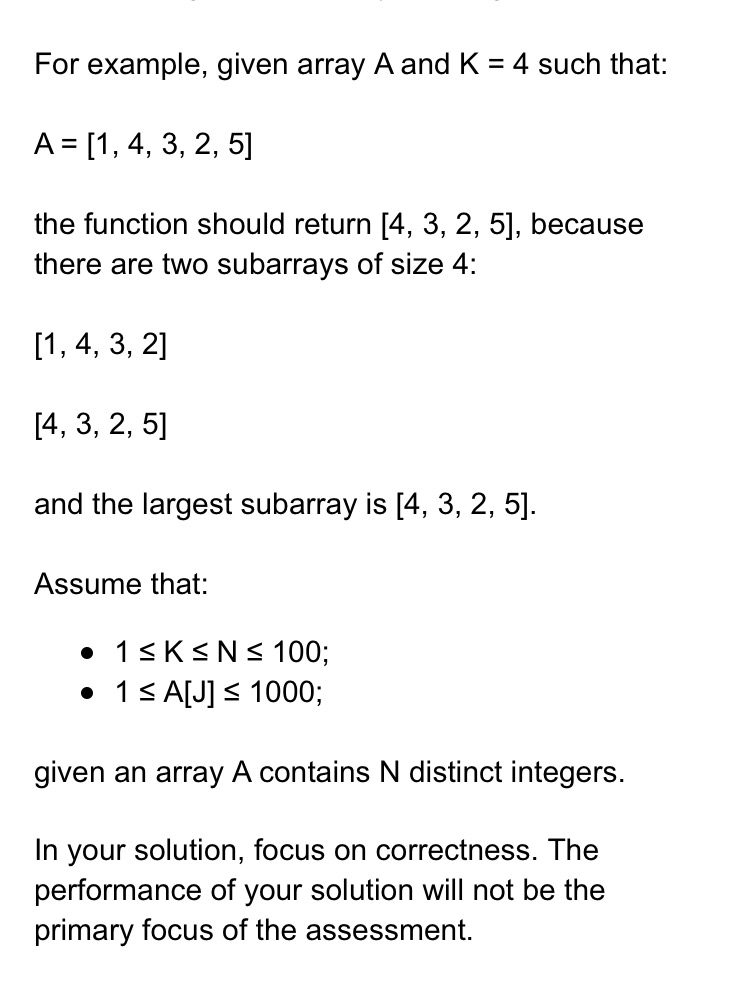

In [7]:
from IPython.display import Image
Image("image_1563485206.png")

In [8]:
def largest_subarray(a, k):
  # store first starting index for a subarray as the largest, since 'a' will always be <= 'k'
  first_idx = 0
  # check indices where a subarray of size k can be made
  for x in range(1, len(a) - k + 1):
    # replace the largest first index if a larger value is found
    if a[first_idx] < a[x]:
      first_idx = x

  # return subarray starting at that largest possible first index with size k
  return a[first_idx:first_idx+k]

In [9]:
def solution(st):
    st = list(st)
    for i in range(5):
        j = 5-1-i
        if j == 4 and st[j] == "?":
            st[j] = '9'
        elif j == 3 and st[j] == '?':
            st[j] = '5'
        elif j == 1 and st[j] == '?':
            if st[0] != "?" and int(st[0]) < 2:
                st[j] = '9'
            else:
                st[j] = '3'
        elif j ==0  and st[j] == '?':
            if st[1] == '4': st[j] = '1'
            else: st[j] = '2'
    return ''.join(st)

print(solution('?2:??'))

22:59


In [10]:
input = [5,3,1,2,4]
class Solution:
    def minloads(self, loads):
        minmax = sum(loads)//2  
        ans = 0
        dp = [[0 for j in range(minmax+1)] for i in range(2)]
        
        for i in range(len(loads)):
            for j in range(minmax+1):
                if i == 0:
                    if j >= loads[i]:
                        dp[i][j] = loads[i]
                else:
                    if j >= loads[i]:
                        dp[i%2][j] = max(dp[(i-1)%2][j-loads[i]] + loads[i], dp[(i-1)%2][j])
                ans = max(ans, dp[i%2][j])
                
        return sum(loads) - ans*2

loads = Solution()
print(loads.minloads(input))


1


In [11]:
def max_booking(booking):
    booked_times = {}
    for room in booking:
        if room[0] == '+':
            booked_times[room[1:]] = booked_times.get(room[1:], 0) + 1
            most_booked = sorted(booked_times.items(), key=lambda x: (-x[1], x[0]))
    return most_booked[0][0]

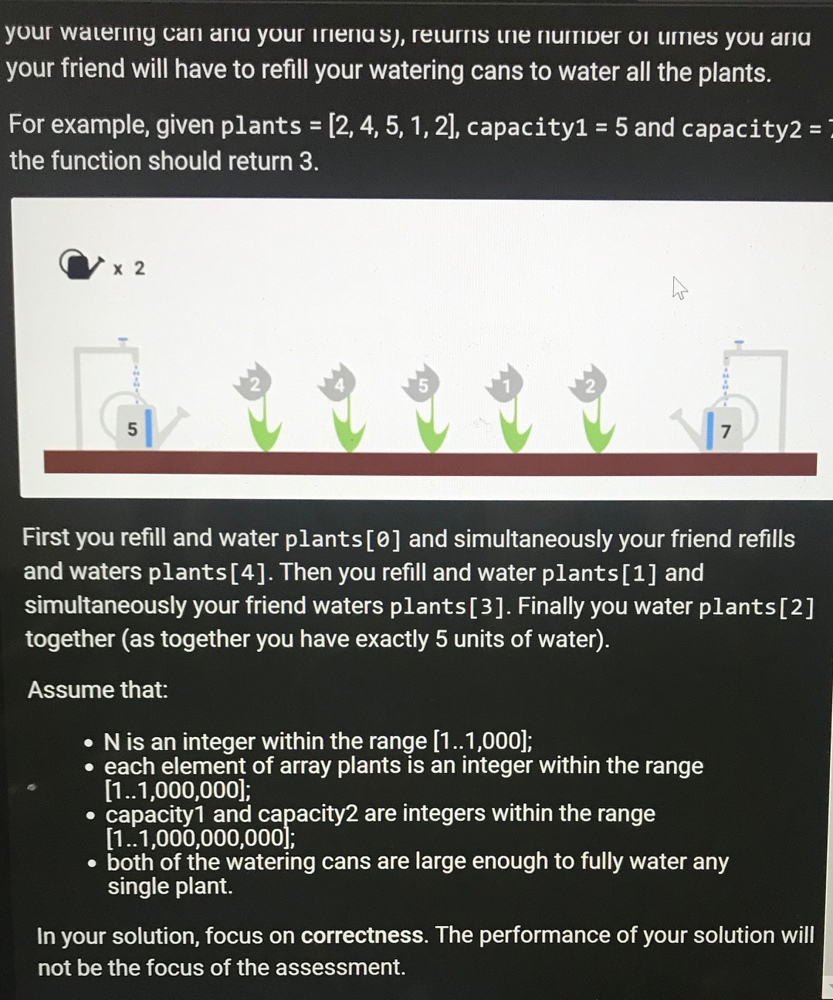

In [12]:
from IPython.display import Image
Image("image_1569876454.png")

In [13]:
#my Python 3 O(N) solution.

def solution(arr: list, c1: int, c2: int) -> int:
    n=len(arr)
    ans=0
    x1,x2=0,0
    for i in range(n//2):
        if x1<arr[i]:
            ans+=1
            x1=c1
        x1-=arr[i]
        if x2<arr[n-i-1]:
            ans+=1
            x2=c2
        x2-=arr[n-i-1]
        #print(x1,x2)
    if n%2:
        if x1+x2<arr[n//2]:
            ans+=1
    return ans


In [14]:
def time_taken(keyboard, text):
    """
    Strategy: map letter to key index. for each char in text, lookup char in map and get abs val diff
    to curr position, add to res. update curr position.
    """
    res, curr = 0, 0
    map = {char: i for i,char in enumerate(keyboard)}
    for char in text:
        diff = abs(map[char] - curr)
        res += diff
        curr = map[char]
    return res

In [15]:
import heapq

class Solution:
    def __init__(self):
        pass
    
    def minChairs(self, S, E):
        
        # Form interval pairs (start time, end time)
        intervals=[[S[i], E[i]] for i in range(len(S))]
        
        # Sort intervals based on start time
        intervals.sort(key=lambda x: x[0])
        
        heap=[]
        res=0
        
        for interval in intervals:
            if not heap or heap[0]>interval[0]:
                # If no chair is free allocate new chair
                res+=1
                heapq.heappush(heap, interval[1])
            else:
                # If any chair is free
                heapq.heappop(heap)
                heapq.heappush(heap, interval[1])
                
        return res
    
s=Solution()
print(s.minChairs([1, 2, 6, 5, 3], [5, 5, 7, 6, 8]))


3


In [16]:
def MinDaysToBloom(roses, k, n): 
    # roses[i], rose i needs roses[i] days to bloom
    # k: min # of adj_flowers
    # n: # of bouquet
    
    maxs = []
    deque = []
    
    for index,value in enumerate(roses):
        if deque and index >= deque[0] + k: # The window size exceeds k
            deque.pop(0)                                    # pop up the first one

        while deque and roses[deque[-1]] < value:  # pop up all the elements that are smaller than the current element
            deque.pop()
        
        deque.append(index)
        if index + 1 >= k:
            maxs.append(roses[deque[0]])

    maxs.sort()
    return maxs[n-1]

In [19]:
def myrow(pos, n):
    # Returns a list of indices of all elements in the row containing position
    output = []
    pos = pos % n
    return list(range(pos,n**2,n))
    
def mycol(pos, n):
    # Returns a list of indices of all elements in the column containing position
    output = []
    pos = (pos // n)*n
    return list(range(pos, pos +n))

def top_diagonal(n):
    # Returns a list of indices of all elements in the top left to bottom right diagonal
    return [i*n + i for i in range(n)]

def other_diagonal(n):
    # Returns a list of indices of all elements in top right to bottom left diagonal
    return [i*n + n - i - 1 for i in range(n)]

def issafe(board, pos, x, n):
    # Returns True if x can be placed on the board
    global global_sum
    if(board[pos] is not None):
        return False
    if(x in board):
        return False
    if(pos == myrow(pos, n)[-1]):
        if(x + sum([board[r] for r in myrow(pos, n)[:-1]]) != global_sum):
            return False
    if(pos == mycol(pos, n)[-1]):
        if(x + sum([board[r] for r in mycol(pos, n)[:-1]]) != global_sum):
            return False
    if(pos == top_diagonal(n)[-1]):
        if(x + sum([board[r] for r in top_diagonal(n)[:-1]]) != global_sum):
            return False
    if(pos == other_diagonal(n)[-1]):
        if(x + sum([board[r] for r in other_diagonal(n)[:-1]]) != global_sum):
            return False
    return True

def fill(board, pos, n):
    #Backtracking through the board
    if(pos >= n**2):
        return True
    for num in range(1, n**2+1):
        if(issafe(board, pos, num, n)):
            board[pos] = num
            if(fill(board, pos+1, n)):
                return True
            else:
                board[pos] = None
    return False

n = 3
global_sum = n*(n**2+1)/2
board = [None]*(n**2)
val = fill(board, 0, n)
output = []
for i in range(n):
    output.append(board[i*n:i*n+n])
print(output)
print(val)

[[2, 7, 6], [9, 5, 1], [4, 3, 8]]
True


In [20]:
#13 Decreasing Subsequences
#sequence = [5,2,4,3,1,6]
sequence = [2, 9, 12, 13, 4, 7, 6, 5, 10]
#sequence = [1,1,1]

import bisect

class Solution:
    def sequence(self, seq):
        subs = []
        
        for s in seq:
            if not subs:
                subs.append(s)
            else:
                idx = bisect.bisect_left(subs, s)
                while idx < len(subs) and subs[idx] == s:
                    idx += 1
                if idx < len(subs) and subs[idx] > s:
                    subs[idx] = s
                else:
                    subs.append(s)
        print("subs:", subs)
        return len(subs)

decrease = Solution()
print(decrease.sequence(sequence))

subs: [2, 4, 5, 10]
4
